In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [4]:
df = fetch_california_housing(as_frame=True)

In [7]:
data = df.frame

In [8]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
data.shape

(20640, 9)

In [12]:
X = data.drop("MedHouseVal",axis = 1)
y = data["MedHouseVal"]

In [13]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
y[:5]

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.3)

Finding Best value of K using GridSearchCV

In [69]:
model = KNeighborsRegressor()
sc = StandardScaler()
operations = [("sc",sc),("model",model)]

In [19]:
pipe = Pipeline(operations)
pipe

Pipeline(steps=[('sc', StandardScaler()), ('model', KNeighborsRegressor())])

In [20]:
n_range = list(range(1,31))
parameters = {"model__n_neighbors":n_range}

In [44]:
grid_model = GridSearchCV(pipe,param_grid=parameters,scoring="neg_mean_squared_error",cv=10)
grid_model.fit(x_train,y_train)
grid_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29, 30]},
             scoring='neg_mean_squared_error')

In [45]:
scores = grid_model.cv_results_["mean_test_score"]


In [46]:
len(scores)

30

In [47]:
scores

array([-0.64995236, -0.48990576, -0.44538646, -0.42763755, -0.41907476,
       -0.41366698, -0.41091112, -0.40939422, -0.41025566, -0.40926288,
       -0.40997979, -0.41056767, -0.41147236, -0.41222506, -0.41246145,
       -0.41442333, -0.41470645, -0.4159622 , -0.41581049, -0.4165147 ,
       -0.41699228, -0.41746353, -0.41833006, -0.41924932, -0.42013654,
       -0.42080953, -0.42177324, -0.42176064, -0.4226179 , -0.42346321])

In [55]:
true_scores = -1*scores

In [52]:
grid_model.best_params_

{'model__n_neighbors': 10}

In [53]:
grid_model.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=10))])

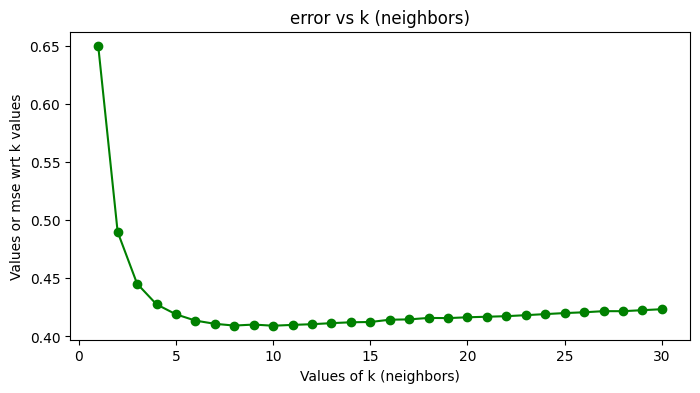

In [56]:
plt.figure(figsize=(8,4))
plt.plot(range(1,31),true_scores,marker="o",color="green")
plt.xlabel("Values of k (neighbors)")
plt.ylabel("Values or mse wrt k values")
plt.title("error vs k (neighbors)")
plt.show()

In [57]:
np.argmin(true_scores)

np.int64(9)

In [60]:
true_scores[9]

np.float64(0.40926287666553945)

In [61]:
true_scores[10]

np.float64(0.40997979185699646)

Final model with k value 9

In [66]:
x_tr_scaled = sc.fit_transform(x_train)
x_te_scaled = sc.transform(x_test)
knn9 = KNeighborsRegressor(n_neighbors=9)
knn9.fit(x_tr_scaled,y_train)
knn9

KNeighborsRegressor(n_neighbors=9)

In [67]:
y_pred = knn9.predict(x_te_scaled)

In [68]:
print(f"MSE : {mean_squared_error(y_test,y_pred)}")
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}")

MSE : 0.42268318232154145
MAE : 0.44650629593741026
RMSE : 0.650140894207972
